In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster
0,0,2019-01-12 12:57:00,0,91.0,0.044698,-0.354073,0.084822,8.879727,22.650238,0
1,1,2019-01-12 12:58:00,1,92.0,0.044651,-0.355277,0.086292,8.866815,22.567017,0
2,2,2019-01-12 14:54:00,0,90.0,46.195190,13.501176,0.142900,12.359906,18.400787,1
3,3,2019-01-12 14:55:00,1,91.0,52.609680,20.752865,0.146236,12.825684,18.013641,1
4,4,2019-01-12 14:56:00,2,91.0,52.399826,12.409351,0.146724,12.998978,18.184570,1
...,...,...,...,...,...,...,...,...,...,...
67,67,2019-01-12 16:00:00,65,90.0,56.223060,11.950031,0.150699,13.565178,18.472809,1
68,68,2019-01-12 16:01:00,66,90.0,56.210205,12.435467,0.150141,13.573656,18.461151,1
69,69,2019-01-12 16:02:00,67,90.0,55.624557,13.516116,0.149580,13.479082,18.306274,1
70,70,2019-01-12 16:03:00,68,90.0,55.665460,13.144032,0.149305,13.485743,18.369293,1


In [4]:
Cluster_1 = df[df['Cluster'] == 0]
Cluster_2 = df[df['Cluster'] == 1]
Cluster_3 = df[df['Cluster'] == 2]

In [5]:
print(Cluster_1.shape)
print(Cluster_2.shape)
print(Cluster_3.shape)

(22, 10)
(41, 10)
(9, 10)


In [8]:
#cond
cond = Cluster_1['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_1 = np.zeros([22,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(22,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 22):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_1[i] = x
cond_pdf_1

array([[0.0014457 ],
       [0.00144567],
       [0.05048585],
       [0.04352639],
       [0.07038714],
       [0.07050851],
       [0.07018278],
       [0.06423984],
       [0.03227498],
       [0.06993211],
       [0.06982442],
       [0.06951011],
       [0.05219348],
       [0.0699961 ],
       [0.06992137],
       [0.06944096],
       [0.0700249 ],
       [0.07008343],
       [0.06979766],
       [0.06986625],
       [0.04395711],
       [0.0542206 ]])

In [9]:
#do
do = Cluster_1['DO']
#do = do.reset_index(drop=True)
do_pdf_1 = np.zeros([22,1])
do=np.asarray(do)
do=np.reshape(do,(22,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 22):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_1[i] = x
do_pdf_1

array([[0.00242598],
       [0.00242482],
       [0.0611692 ],
       [0.05976507],
       [0.0597634 ],
       [0.04173849],
       [0.05111177],
       [0.03289832],
       [0.03178244],
       [0.04971031],
       [0.03534011],
       [0.04235476],
       [0.05789174],
       [0.0603619 ],
       [0.06067667],
       [0.05928708],
       [0.04603257],
       [0.0405685 ],
       [0.06158402],
       [0.06222859],
       [0.05951129],
       [0.04309018]])

In [11]:
#orp
orp = Cluster_1['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_1 = np.zeros([22,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(22,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 22):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_1[i] = x
orp_pdf_1

array([[ 0.20055453],
       [ 0.26390455],
       [23.95708609],
       [23.60693367],
       [24.13482286],
       [24.36393621],
       [24.39716145],
       [17.86518981],
       [20.96057371],
       [24.3398688 ],
       [22.13387517],
       [24.20968062],
       [24.31626456],
       [24.20326974],
       [24.1410991 ],
       [24.01215022],
       [20.2359554 ],
       [16.10267558],
       [23.82308755],
       [23.57653804],
       [20.57031764],
       [21.46535111]])

In [12]:
#ph
ph = Cluster_1['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_1 = np.zeros([22,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(22,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 22):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_1[i] = x
ph_pdf_1

array([[0.00183372],
       [0.00178677],
       [0.2543146 ],
       [0.24010052],
       [0.22183933],
       [0.22369414],
       [0.24580749],
       [0.24412535],
       [0.24512029],
       [0.23738672],
       [0.2416468 ],
       [0.24213543],
       [0.24966783],
       [0.23461353],
       [0.24142139],
       [0.2471839 ],
       [0.24652755],
       [0.24588936],
       [0.23736167],
       [0.23422303],
       [0.25231633],
       [0.23920754]])

In [13]:
#WT
wt = Cluster_1['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_1 = np.zeros([22,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(22,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 22):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_1[i] = x
wt_pdf_1

array([[0.00179817],
       [0.00218008],
       [0.26561864],
       [0.27373808],
       [0.27698543],
       [0.2775284 ],
       [0.27764148],
       [0.27584093],
       [0.27360539],
       [0.27813447],
       [0.27856581],
       [0.27885814],
       [0.2786406 ],
       [0.27965835],
       [0.27986254],
       [0.27998507],
       [0.28031133],
       [0.28067256],
       [0.28040482],
       [0.28133258],
       [0.27834024],
       [0.27932196]])

In [15]:
#Cluster 2

In [17]:
#cond
cond = Cluster_2['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_2 = np.zeros([41,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(41,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 41):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_2[i] = x
cond_pdf_2

array([[8.22151981e-06],
       [1.32040544e-01],
       [1.16899218e-01],
       [1.54782730e-01],
       [2.00254196e-01],
       [2.01077570e-01],
       [1.66546803e-01],
       [1.70856024e-01],
       [2.09813449e-01],
       [1.80032088e-01],
       [1.96028540e-01],
       [1.87315113e-01],
       [2.12780712e-01],
       [1.71440319e-01],
       [1.95270217e-01],
       [2.13300033e-01],
       [2.16562010e-01],
       [2.16999569e-01],
       [2.18348460e-01],
       [2.17802429e-01],
       [2.14523479e-01],
       [2.15076394e-01],
       [1.78827552e-01],
       [2.07756947e-01],
       [2.06726751e-01],
       [1.38259499e-01],
       [1.89129185e-01],
       [1.62703812e-01],
       [1.38294802e-01],
       [1.42469957e-01],
       [1.33805632e-01],
       [1.13358911e-01],
       [1.22143310e-01],
       [1.13221252e-01],
       [1.20855400e-01],
       [1.33404749e-01],
       [1.35786198e-01],
       [1.36717209e-01],
       [1.77100042e-01],
       [1.74509112e-01],


In [18]:
#do
do = Cluster_2['DO']
#do = do.reset_index(drop=True)
do_pdf_2 = np.zeros([41,1])
do=np.asarray(do)
do=np.reshape(do,(41,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 41):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_2[i] = x
do_pdf_2

array([[0.11350196],
       [0.00066619],
       [0.13712064],
       [0.13787888],
       [0.14291332],
       [0.11384092],
       [0.05666352],
       [0.12169015],
       [0.13098514],
       [0.10962278],
       [0.14057579],
       [0.11942381],
       [0.13508504],
       [0.14266076],
       [0.14261417],
       [0.12847992],
       [0.13682806],
       [0.13755126],
       [0.09979341],
       [0.08566232],
       [0.08040442],
       [0.07583633],
       [0.0738246 ],
       [0.08156422],
       [0.08791228],
       [0.0063514 ],
       [0.01425691],
       [0.14275239],
       [0.03281707],
       [0.05878078],
       [0.12063831],
       [0.12560252],
       [0.13294813],
       [0.13948682],
       [0.14214903],
       [0.1429165 ],
       [0.14183598],
       [0.13674601],
       [0.11308869],
       [0.12279221],
       [0.10498029]])

In [19]:
#orp
orp = Cluster_2['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_2 = np.zeros([41,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(41,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 41):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_2[i] = x
orp_pdf_2

array([[0.14291632],
       [0.1429165 ],
       [0.14291651],
       [0.14291626],
       [0.1429162 ],
       [0.14291622],
       [0.1429165 ],
       [0.14291643],
       [0.14291633],
       [0.14291632],
       [0.14291645],
       [0.1429165 ],
       [0.14291649],
       [0.14291648],
       [0.14291646],
       [0.14291645],
       [0.14291651],
       [0.14291646],
       [0.14291643],
       [0.14291641],
       [0.14291638],
       [0.14291638],
       [0.14291641],
       [0.1429164 ],
       [0.14291644],
       [0.14291607],
       [0.14291595],
       [0.14291592],
       [0.14291586],
       [0.14291599],
       [0.14291609],
       [0.14291622],
       [0.14291622],
       [0.14291633],
       [0.14291638],
       [0.14291641],
       [0.14291643],
       [0.14291646],
       [0.14291648],
       [0.14291649],
       [0.14291651]])

In [20]:
#ph
ph = Cluster_2['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_2 = np.zeros([41,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(41,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 41):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_2[i] = x
ph_pdf_2

array([[0.13531612],
       [0.14101352],
       [0.14217998],
       [0.14282655],
       [0.14291308],
       [0.14291495],
       [0.14286767],
       [0.1427135 ],
       [0.14265696],
       [0.14183425],
       [0.14215308],
       [0.14167914],
       [0.14253431],
       [0.14289632],
       [0.1428172 ],
       [0.14286364],
       [0.1428694 ],
       [0.14291649],
       [0.14291647],
       [0.14291536],
       [0.14289769],
       [0.14291519],
       [0.14281618],
       [0.14291444],
       [0.14291652],
       [0.14291027],
       [0.14289304],
       [0.14257914],
       [0.1424124 ],
       [0.14218892],
       [0.14192682],
       [0.14174981],
       [0.14221289],
       [0.14184815],
       [0.14207771],
       [0.14211458],
       [0.14218687],
       [0.14214252],
       [0.14256345],
       [0.14253912],
       [0.1425617 ]])

In [22]:
#WT
wt = Cluster_2['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_2 = np.zeros([41,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(41,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 41):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_2[i] = x
wt_pdf_2

array([[0.14238621],
       [0.14271997],
       [0.14291102],
       [0.1428091 ],
       [0.14272949],
       [0.14275335],
       [0.14195634],
       [0.14280515],
       [0.1426427 ],
       [0.14258437],
       [0.14220141],
       [0.1409928 ],
       [0.14088608],
       [0.1418134 ],
       [0.14245764],
       [0.14284323],
       [0.14290559],
       [0.14263047],
       [0.14285892],
       [0.14215469],
       [0.14286843],
       [0.14291616],
       [0.14249062],
       [0.14288389],
       [0.14288864],
       [0.14291525],
       [0.14136045],
       [0.142916  ],
       [0.14291578],
       [0.14291555],
       [0.14288918],
       [0.14256754],
       [0.14283714],
       [0.14247136],
       [0.14264949],
       [0.14213626],
       [0.14202251],
       [0.14208774],
       [0.14272068],
       [0.14251573],
       [0.14231198]])

In [23]:
#Cluster 3

In [25]:
#cond
cond = Cluster_3['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_3 = np.zeros([9,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(9,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_3[i] = x
cond_pdf_3

array([[0.00708167],
       [0.09800903],
       [0.09477092],
       [0.1372955 ],
       [0.04098756],
       [0.08116707],
       [0.11132787],
       [0.00136225],
       [0.03607104]])

In [26]:
#do
do = Cluster_3['DO']
#do = do.reset_index(drop=True)
do_pdf_3 = np.zeros([9,1])
do=np.asarray(do)
do=np.reshape(do,(9,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_3[i] = x
do_pdf_3

array([[0.14067092],
       [0.12728778],
       [0.13523702],
       [0.12322949],
       [0.13617037],
       [0.13050946],
       [0.12290188],
       [0.12479033],
       [0.02152607]])

In [27]:
#orp
orp = Cluster_3['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_3 = np.zeros([9,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(9,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_3[i] = x
orp_pdf_3

array([[0.14291642],
       [0.14291649],
       [0.14291638],
       [0.14291651],
       [0.14291626],
       [0.14291647],
       [0.14291652],
       [0.1429164 ],
       [0.14291648]])

In [28]:
#ph
ph = Cluster_3['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_3 = np.zeros([9,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(9,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_3[i] = x
ph_pdf_3

array([[0.14141967],
       [0.14280767],
       [0.14291242],
       [0.14275725],
       [0.1427957 ],
       [0.14283573],
       [0.14276433],
       [0.14029567],
       [0.14265954]])

In [29]:
#WT
wt = Cluster_3['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_3 = np.zeros([9,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(9,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_3[i] = x
wt_pdf_3

array([[0.14038076],
       [0.14283271],
       [0.14291045],
       [0.14285804],
       [0.1429159 ],
       [0.14290959],
       [0.14282661],
       [0.1428452 ],
       [0.1428173 ]])

In [30]:
#Calculating Alpha

In [31]:
alpha_cond = max(cond_pdf_1.max(), cond_pdf_2.max(), cond_pdf_3.max())
alpha_do = max(do_pdf_1.max(), do_pdf_2.max(), do_pdf_3.max())
alpha_orp = max(orp_pdf_1.max(), orp_pdf_2.max(), orp_pdf_3.max())
alpha_ph = max(ph_pdf_1.max(), ph_pdf_2.max(), ph_pdf_3.max())
alpha_wt = max(wt_pdf_1.max(), wt_pdf_2.max(), wt_pdf_3.max())

In [32]:
beta_cond = alpha_cond/(cond_pdf_1.sum() + cond_pdf_2.sum() + cond_pdf_3.sum())
beta_do = alpha_do/(do_pdf_1.sum() + do_pdf_2.sum() + do_pdf_3.sum())
beta_orp = alpha_orp/(orp_pdf_1.sum() + orp_pdf_2.sum() + orp_pdf_3.sum())
beta_ph = alpha_ph/(ph_pdf_1.sum() + ph_pdf_2.sum() + ph_pdf_3.sum())
beta_wt = alpha_wt/(wt_pdf_1.sum() + wt_pdf_2.sum() + wt_pdf_3.sum())

In [33]:
cond_1 = pd.DataFrame(cond_pdf_1, columns = ['COND']) 
do_1 = pd.DataFrame(do_pdf_1, columns = ['DO'])
orp_1 = pd.DataFrame(orp_pdf_1, columns = ['ORP'])
ph_1 = pd.DataFrame(ph_pdf_1, columns = ['PH'])
wt_1 = pd.DataFrame(wt_pdf_1, columns = ['WT'])
data_1 = pd.concat([cond_1, do_1, orp_1, ph_1, wt_1], axis=1)
data_1

,COND,DO,ORP,PH,WT
0,0.001446,0.002426,0.200555,0.001834,0.001798
1,0.001446,0.002425,0.263905,0.001787,0.002180
2,0.050486,0.061169,23.957086,0.254315,0.265619
3,0.043526,0.059765,23.606934,0.240101,0.273738
4,0.070387,0.059763,24.134823,0.221839,0.276985
5,0.070509,0.041738,24.363936,0.223694,0.277528
6,0.070183,0.051112,24.397161,0.245807,0.277641
7,0.064240,0.032898,17.865190,0.244125,0.275841
8,0.032275,0.031782,20.960574,0.245120,0.273605
9,0.069932,0.049710,24.339869,0.237387,0.278134


In [34]:
cond_2 = pd.DataFrame(cond_pdf_2, columns = ['COND']) 
do_2 = pd.DataFrame(do_pdf_2, columns = ['DO'])
orp_2 = pd.DataFrame(orp_pdf_2, columns = ['ORP'])
ph_2 = pd.DataFrame(ph_pdf_2, columns = ['PH'])
wt_2 = pd.DataFrame(wt_pdf_2, columns = ['WT'])
data_2 = pd.concat([cond_2, do_2, orp_2, ph_2, wt_2], axis=1)
data_2

,COND,DO,ORP,PH,WT
0,0.000008,0.113502,0.142916,0.135316,0.142386
1,0.132041,0.000666,0.142917,0.141014,0.142720
2,0.116899,0.137121,0.142917,0.142180,0.142911
3,0.154783,0.137879,0.142916,0.142827,0.142809
4,0.200254,0.142913,0.142916,0.142913,0.142729
5,0.201078,0.113841,0.142916,0.142915,0.142753
6,0.166547,0.056664,0.142917,0.142868,0.141956
7,0.170856,0.121690,0.142916,0.142714,0.142805
8,0.209813,0.130985,0.142916,0.142657,0.142643
9,0.180032,0.109623,0.142916,0.141834,0.142584


In [35]:
cond_3 = pd.DataFrame(cond_pdf_3, columns = ['COND']) 
do_3 = pd.DataFrame(do_pdf_3, columns = ['DO'])
orp_3 = pd.DataFrame(orp_pdf_3, columns = ['ORP'])
ph_3 = pd.DataFrame(ph_pdf_3, columns = ['PH'])
wt_3 = pd.DataFrame(wt_pdf_3, columns = ['WT'])
data_3 = pd.concat([cond_3, do_3, orp_3, ph_3, wt_3], axis=1)
data_3

,COND,DO,ORP,PH,WT
0,0.007082,0.140671,0.142916,0.141420,0.140381
1,0.098009,0.127288,0.142916,0.142808,0.142833
2,0.094771,0.135237,0.142916,0.142912,0.142910
3,0.137295,0.123229,0.142917,0.142757,0.142858
4,0.040988,0.136170,0.142916,0.142796,0.142916
5,0.081167,0.130509,0.142916,0.142836,0.142910
6,0.111328,0.122902,0.142917,0.142764,0.142827
7,0.001362,0.124790,0.142916,0.140296,0.142845
8,0.036071,0.021526,0.142916,0.142660,0.142817


In [ ]:
#Cluster 1

In [36]:
#cond
cond_pdf = data_1['COND']
m1_cond = np.zeros([22,1])
for i in range(0, 22):
    x = (cond_pdf[i]/(cond_pdf_1.sum() + 22*(1-(alpha_cond*beta_cond))))
    m1_cond[i] = x
m1_cond

array([[6.24938818e-05],
       [6.24924052e-05],
       [2.18236840e-03],
       [1.88152952e-03],
       [3.04264803e-03],
       [3.04789470e-03],
       [3.03381427e-03],
       [2.77691685e-03],
       [1.39516103e-03],
       [3.02297831e-03],
       [3.01832304e-03],
       [3.00473662e-03],
       [2.25618494e-03],
       [3.02574434e-03],
       [3.02251403e-03],
       [3.00174735e-03],
       [3.02698964e-03],
       [3.02951966e-03],
       [3.01716650e-03],
       [3.02013162e-03],
       [1.90014829e-03],
       [2.34381175e-03]])

In [37]:
#do
do_pdf = data_1['DO']
m1_do = np.zeros([22,1])
for i in range(0, 22):
    x = (do_pdf[i]/(do_pdf_1.sum() + 22*(1-(alpha_do*beta_do))))
    m1_do[i] = x
m1_do

array([[0.0001057 ],
       [0.00010565],
       [0.00266503],
       [0.00260385],
       [0.00260378],
       [0.00181847],
       [0.00222685],
       [0.00143332],
       [0.0013847 ],
       [0.00216579],
       [0.0015397 ],
       [0.00184532],
       [0.00252224],
       [0.00262986],
       [0.00264357],
       [0.00258303],
       [0.00200555],
       [0.0017675 ],
       [0.0026831 ],
       [0.00271119],
       [0.0025928 ],
       [0.00187736]])

In [38]:
#orp
orp_pdf = data_1['ORP']
m1_orp = np.zeros([22,1])
for i in range(0, 22):
    x = (orp_pdf[i]/(orp_pdf_1.sum() + 22*(1-(alpha_orp*beta_orp))))
    m1_orp[i] = x
m1_orp

array([[0.00044926],
       [0.00059116],
       [0.05366553],
       [0.05288116],
       [0.05406367],
       [0.0545769 ],
       [0.05465133],
       [0.04001926],
       [0.04695313],
       [0.05452299],
       [0.04958141],
       [0.05423136],
       [0.05447011],
       [0.054217  ],
       [0.05407773],
       [0.05378888],
       [0.04532994],
       [0.03607111],
       [0.05336536],
       [0.05281307],
       [0.04607893],
       [0.04808387]])

In [39]:
#ph
ph_pdf = data_1['PH']
m1_ph = np.zeros([22,1])
for i in range(0, 22):
    x = (ph_pdf[i]/(ph_pdf_1.sum() + 22*(1-(alpha_ph*beta_ph))))
    m1_ph[i] = x
m1_ph

array([[6.86552898e-05],
       [6.68972861e-05],
       [9.52165285e-03],
       [8.98947156e-03],
       [8.30576422e-03],
       [8.37520930e-03],
       [9.20314279e-03],
       [9.14016277e-03],
       [9.17741394e-03],
       [8.88786563e-03],
       [9.04736497e-03],
       [9.06565933e-03],
       [9.34767576e-03],
       [8.78403601e-03],
       [9.03892547e-03],
       [9.25467622e-03],
       [9.23010228e-03],
       [9.20620813e-03],
       [8.88692777e-03],
       [8.76941541e-03],
       [9.44683692e-03],
       [8.95603799e-03]])

In [41]:
#wt
wt_pdf = data_1['WT']
m1_wt = np.zeros([22,1])
for i in range(0, 22):
    x = (wt_pdf[i]/(wt_pdf_1.sum() + 22*(1-(alpha_wt*beta_wt))))
    m1_wt[i] = x
m1_wt

array([[6.55746274e-05],
       [7.95019793e-05],
       [9.68642110e-03],
       [9.98251583e-03],
       [1.01009386e-02],
       [1.01207392e-02],
       [1.01248629e-02],
       [1.00592013e-02],
       [9.97767713e-03],
       [1.01428408e-02],
       [1.01585707e-02],
       [1.01692312e-02],
       [1.01612980e-02],
       [1.01984128e-02],
       [1.02058592e-02],
       [1.02103274e-02],
       [1.02222254e-02],
       [1.02353983e-02],
       [1.02256347e-02],
       [1.02594675e-02],
       [1.01503446e-02],
       [1.01861454e-02]])

In [42]:
cond_ = pd.DataFrame(m1_cond, columns = ['COND']) 
do_ = pd.DataFrame(m1_do, columns = ['DO'])
orp_ = pd.DataFrame(m1_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m1_ph, columns = ['PH'])
wt_ = pd.DataFrame(m1_wt, columns = ['WT'])
d1 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d1

,COND,DO,ORP,PH,WT
0,0.000062,0.000106,0.000449,0.000069,0.000066
1,0.000062,0.000106,0.000591,0.000067,0.000080
2,0.002182,0.002665,0.053666,0.009522,0.009686
3,0.001882,0.002604,0.052881,0.008989,0.009983
4,0.003043,0.002604,0.054064,0.008306,0.010101
5,0.003048,0.001818,0.054577,0.008375,0.010121
6,0.003034,0.002227,0.054651,0.009203,0.010125
7,0.002777,0.001433,0.040019,0.009140,0.010059
8,0.001395,0.001385,0.046953,0.009177,0.009978
9,0.003023,0.002166,0.054523,0.008888,0.010143


In [44]:
#cond
cond_pdf = data_2['COND']
m2_cond = np.zeros([41,1])
for i in range(0, 41):
    x = (cond_pdf[i]/(cond_pdf_2.sum() + 41*(1-(alpha_cond*beta_cond))))
    m2_cond[i] = x
m2_cond

array([[1.72452271e-07],
       [2.76964504e-03],
       [2.45204488e-03],
       [3.24667871e-03],
       [4.20047530e-03],
       [4.21774616e-03],
       [3.49343856e-03],
       [3.58382757e-03],
       [4.40098747e-03],
       [3.77630209e-03],
       [4.11183913e-03],
       [3.92906875e-03],
       [4.46322795e-03],
       [3.59608357e-03],
       [4.09593277e-03],
       [4.47412107e-03],
       [4.54254339e-03],
       [4.55172150e-03],
       [4.58001544e-03],
       [4.56856206e-03],
       [4.49978373e-03],
       [4.51138152e-03],
       [3.75103607e-03],
       [4.35785087e-03],
       [4.33624178e-03],
       [2.90009209e-03],
       [3.96712022e-03],
       [3.41282907e-03],
       [2.90083259e-03],
       [2.98840947e-03],
       [2.80666904e-03],
       [2.37778442e-03],
       [2.56204347e-03],
       [2.37489692e-03],
       [2.53502863e-03],
       [2.79826022e-03],
       [2.84821283e-03],
       [2.86774146e-03],
       [3.71480031e-03],
       [3.66045370e-03],


In [45]:
#do
do_pdf = data_2['DO']
m2_do = np.zeros([41,1])
for i in range(0, 41):
    x = (do_pdf[i]/(do_pdf_2.sum() + 41*(1-(alpha_do*beta_do))))
    m2_do[i] = x
m2_do

array([[2.50654073e-03],
       [1.47119787e-05],
       [3.02812793e-03],
       [3.04487275e-03],
       [3.15605154e-03],
       [2.51402618e-03],
       [1.25133882e-03],
       [2.68736589e-03],
       [2.89263346e-03],
       [2.42087412e-03],
       [3.10443037e-03],
       [2.63731681e-03],
       [2.98317446e-03],
       [3.15047412e-03],
       [3.14944539e-03],
       [2.83730913e-03],
       [3.02166664e-03],
       [3.03763753e-03],
       [2.20380547e-03],
       [1.89173909e-03],
       [1.77562522e-03],
       [1.67474506e-03],
       [1.63031860e-03],
       [1.80123781e-03],
       [1.94142648e-03],
       [1.40262183e-04],
       [3.14845059e-04],
       [3.15249779e-03],
       [7.24721574e-04],
       [1.29809568e-03],
       [2.66413739e-03],
       [2.77376540e-03],
       [2.93598357e-03],
       [3.08038191e-03],
       [3.13917332e-03],
       [3.15612178e-03],
       [3.13225989e-03],
       [3.01985469e-03],
       [2.49741414e-03],
       [2.71170341e-03],


In [46]:
#orp
orp_pdf = data_2['ORP']
m2_orp = np.zeros([41,1])
for i in range(0, 41):
    x = (orp_pdf[i]/(orp_pdf_2.sum() + 41*(1-(alpha_orp*beta_orp))))
    m2_orp[i] = x
m2_orp

array([[-0.02308912],
       [-0.02308915],
       [-0.02308915],
       [-0.02308911],
       [-0.0230891 ],
       [-0.02308911],
       [-0.02308915],
       [-0.02308914],
       [-0.02308912],
       [-0.02308912],
       [-0.02308914],
       [-0.02308915],
       [-0.02308915],
       [-0.02308915],
       [-0.02308915],
       [-0.02308914],
       [-0.02308915],
       [-0.02308915],
       [-0.02308914],
       [-0.02308914],
       [-0.02308913],
       [-0.02308913],
       [-0.02308914],
       [-0.02308914],
       [-0.02308914],
       [-0.02308908],
       [-0.02308906],
       [-0.02308906],
       [-0.02308905],
       [-0.02308907],
       [-0.02308909],
       [-0.02308911],
       [-0.02308911],
       [-0.02308913],
       [-0.02308913],
       [-0.02308914],
       [-0.02308914],
       [-0.02308915],
       [-0.02308915],
       [-0.02308915],
       [-0.02308915]])

In [47]:
#ph
ph_pdf = data_2['PH']
m2_ph = np.zeros([41,1])
for i in range(0, 41):
    x = (ph_pdf[i]/(ph_pdf_2.sum() + 41*(1-(alpha_ph*beta_ph))))
    m2_ph[i] = x
m2_ph

array([[0.00290296],
       [0.00302519],
       [0.00305021],
       [0.00306408],
       [0.00306594],
       [0.00306598],
       [0.00306496],
       [0.00306166],
       [0.00306044],
       [0.00304279],
       [0.00304963],
       [0.00303947],
       [0.00305781],
       [0.00306558],
       [0.00306388],
       [0.00306488],
       [0.003065  ],
       [0.00306601],
       [0.00306601],
       [0.00306599],
       [0.00306561],
       [0.00306598],
       [0.00306386],
       [0.00306597],
       [0.00306601],
       [0.00306588],
       [0.00306551],
       [0.00305877],
       [0.0030552 ],
       [0.0030504 ],
       [0.00304478],
       [0.00304098],
       [0.00305092],
       [0.00304309],
       [0.00304802],
       [0.00304881],
       [0.00305036],
       [0.00304941],
       [0.00305844],
       [0.00305792],
       [0.0030584 ]])

In [48]:
#wt
wt_pdf = data_2['WT']
m2_wt = np.zeros([41,1])
for i in range(0, 41):
    x = (wt_pdf[i]/(wt_pdf_2.sum() + 41*(1-(alpha_wt*beta_wt))))
    m2_wt[i] = x
m2_wt

array([[0.00305638],
       [0.00306355],
       [0.00306765],
       [0.00306546],
       [0.00306375],
       [0.00306426],
       [0.00304716],
       [0.00306538],
       [0.00306189],
       [0.00306064],
       [0.00305242],
       [0.00302647],
       [0.00302418],
       [0.00304409],
       [0.00305792],
       [0.00306619],
       [0.00306753],
       [0.00306163],
       [0.00306653],
       [0.00305141],
       [0.00306673],
       [0.00306776],
       [0.00305863],
       [0.00306707],
       [0.00306717],
       [0.00306774],
       [0.00303437],
       [0.00306776],
       [0.00306775],
       [0.00306775],
       [0.00306718],
       [0.00306028],
       [0.00306606],
       [0.00305821],
       [0.00306204],
       [0.00305102],
       [0.00304858],
       [0.00304998],
       [0.00306356],
       [0.00305916],
       [0.00305479]])

In [49]:
cond_ = pd.DataFrame(m2_cond, columns = ['COND']) 
do_ = pd.DataFrame(m2_do, columns = ['DO'])
orp_ = pd.DataFrame(m2_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m2_ph, columns = ['PH'])
wt_ = pd.DataFrame(m2_wt, columns = ['WT'])
d2 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d2

,COND,DO,ORP,PH,WT
0,1.724523e-07,0.002507,-0.023089,0.002903,0.003056
1,2.769645e-03,0.000015,-0.023089,0.003025,0.003064
2,2.452045e-03,0.003028,-0.023089,0.003050,0.003068
3,3.246679e-03,0.003045,-0.023089,0.003064,0.003065
4,4.200475e-03,0.003156,-0.023089,0.003066,0.003064
5,4.217746e-03,0.002514,-0.023089,0.003066,0.003064
6,3.493439e-03,0.001251,-0.023089,0.003065,0.003047
7,3.583828e-03,0.002687,-0.023089,0.003062,0.003065
8,4.400987e-03,0.002893,-0.023089,0.003060,0.003062
9,3.776302e-03,0.002421,-0.023089,0.003043,0.003061


In [50]:
#Cluster 3

In [52]:
#cond
cond_pdf = data_3['COND']
m3_cond = np.zeros([9,1])
for i in range(0, 9):
    x = (cond_pdf[i]/(cond_pdf_3.sum() + 9*(1-(alpha_cond*beta_cond))))
    m3_cond[i] = x
m3_cond

array([[0.00074083],
       [0.01025297],
       [0.00991423],
       [0.01436283],
       [0.00428781],
       [0.00849109],
       [0.01164629],
       [0.00014251],
       [0.00377348]])

In [53]:
#do
do_pdf = data_3['DO']
m3_do = np.zeros([9,1])
for i in range(0, 9):
    x = (do_pdf[i]/(do_pdf_3.sum() + 9*(1-(alpha_do*beta_do))))
    m3_do[i] = x
m3_do

array([[0.0140194 ],
       [0.01268562],
       [0.01347785],
       [0.01228117],
       [0.01357087],
       [0.01300669],
       [0.01224852],
       [0.01243672],
       [0.00214531]])

In [54]:
#orp
orp_pdf = data_3['ORP']
m3_orp = np.zeros([9,1])
for i in range(0, 9):
    x = (orp_pdf[i]/(orp_pdf_3.sum() + 9*(1-(alpha_orp*beta_orp))))
    m3_orp[i] = x
m3_orp

array([[-0.10518392],
       [-0.10518398],
       [-0.10518389],
       [-0.10518398],
       [-0.1051838 ],
       [-0.10518396],
       [-0.10518399],
       [-0.1051839 ],
       [-0.10518397]])

In [55]:
#ph
ph_pdf = data_3['PH']
m3_ph = np.zeros([9,1])
for i in range(0, 9):
    x = (ph_pdf[i]/(ph_pdf_3.sum() + 9*(1-(alpha_ph*beta_ph))))
    m3_ph[i] = x
m3_ph

array([[0.01382062],
       [0.01395626],
       [0.0139665 ],
       [0.01395133],
       [0.01395509],
       [0.013959  ],
       [0.01395203],
       [0.01371077],
       [0.01394178]])

In [56]:
#wt
wt_pdf = data_3['WT']
m3_wt = np.zeros([9,1])
for i in range(0, 9):
    x = (wt_pdf[i]/(wt_pdf_3.sum() + 9*(1-(alpha_wt*beta_wt))))
    m3_wt[i] = x
m3_wt

array([[0.0137263 ],
       [0.01396605],
       [0.01397365],
       [0.01396852],
       [0.01397418],
       [0.01397356],
       [0.01396545],
       [0.01396727],
       [0.01396454]])

In [57]:
cond_ = pd.DataFrame(m3_cond, columns = ['COND']) 
do_ = pd.DataFrame(m3_do, columns = ['DO'])
orp_ = pd.DataFrame(m3_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m3_ph, columns = ['PH'])
wt_ = pd.DataFrame(m3_wt, columns = ['WT'])
d3 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d3

,COND,DO,ORP,PH,WT
0,0.000741,0.014019,-0.105184,0.013821,0.013726
1,0.010253,0.012686,-0.105184,0.013956,0.013966
2,0.009914,0.013478,-0.105184,0.013966,0.013974
3,0.014363,0.012281,-0.105184,0.013951,0.013969
4,0.004288,0.013571,-0.105184,0.013955,0.013974
5,0.008491,0.013007,-0.105184,0.013959,0.013974
6,0.011646,0.012249,-0.105184,0.013952,0.013965
7,0.000143,0.012437,-0.105184,0.013711,0.013967
8,0.003773,0.002145,-0.105184,0.013942,0.013965


In [58]:
d1.to_csv('DST_Cluster_1.csv', index = False)
d2.to_csv('DST_Cluster_2.csv', index = False)
d3.to_csv('DST_Cluster_3.csv', index = False)

In [155]:
df = pd.read_csv('DST.csv')

In [156]:
X = df[['COND', 'DO', 'PH', 'WT']]
X

,COND,DO,PH,WT
0,6.250000e-05,0.000106,0.000069,0.000066
1,6.250000e-05,0.000106,0.000067,0.000080
2,1.720000e-07,0.002507,0.002903,0.003056
3,2.769645e-03,0.000015,0.003025,0.003064
4,2.452045e-03,0.003028,0.003050,0.003068
...,...,...,...,...
67,2.848213e-03,0.003132,0.003050,0.003049
68,2.867741e-03,0.003020,0.003049,0.003050
69,3.714800e-03,0.002497,0.003058,0.003064
70,3.660454e-03,0.002712,0.003058,0.003059


In [157]:
Y=df['Cluster']

In [158]:
from sklearn.metrics import roc_curve,auc

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, X, Y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.959047619047619


In [161]:
import seaborn as sns

In [162]:
XC=X

In [163]:
XC.corr()

,COND,DO,PH,WT
COND,1.000000,0.571852,0.362321,0.313687
DO,0.571852,1.000000,0.680537,0.617057
PH,0.362321,0.680537,1.000000,0.993938
WT,0.313687,0.617057,0.993938,1.000000


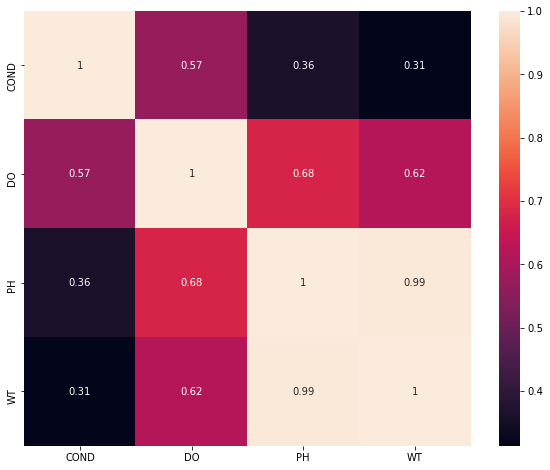

In [164]:
plt.figure(figsize = (10, 8))
sns.heatmap(XC.corr(), annot = True)
plt.show()

In [165]:
Xt = df[['COND', 'DO', 'PH', 'WT']]
Xt

,COND,DO,PH,WT
0,6.250000e-05,0.000106,0.000069,0.000066
1,6.250000e-05,0.000106,0.000067,0.000080
2,1.720000e-07,0.002507,0.002903,0.003056
3,2.769645e-03,0.000015,0.003025,0.003064
4,2.452045e-03,0.003028,0.003050,0.003068
...,...,...,...,...
67,2.848213e-03,0.003132,0.003050,0.003049
68,2.867741e-03,0.003020,0.003049,0.003050
69,3.714800e-03,0.002497,0.003058,0.003064
70,3.660454e-03,0.002712,0.003058,0.003059


In [166]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, Xt, Y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.9733333333333334


In [167]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
y_score_2 = cross_val_score(lreg, Xt, Y, cv=5)
lreg_score = y_score_2.mean()
print(lreg_score)

0.5704761904761904


In [168]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_score_3 = cross_val_score(gnb, Xt, Y, cv=5)
gnb_score = y_score_3.mean()
print(gnb_score)

0.9723809523809525


In [169]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(Xt,Y,train_size=1,test_size=0.5,random_state=123)

In [170]:
from sklearn.naive_bayes import GaussianNB

In [171]:
gnb = GaussianNB()

In [172]:
#x_train,x_test,y_train,y_test=train_test_split(Xt,Y,train_size=1,test_size=0.5,random_state=123)

In [173]:
gnb.fit(Xt, Y)

GaussianNB()

In [206]:
df = pd.read_csv('test.csv')

In [207]:
df

,COND,DO,ORP,PH,WT,Cluster
0,400.01830,12.10596,0.119869,8.321671,26.553467,3
1,399.96484,12.10596,0.119635,8.311798,26.542145,3
2,399.91890,12.10596,0.119477,8.312472,26.540070,3
3,399.95530,12.10596,0.119374,8.309348,26.540009,3
4,399.89008,12.10596,0.119602,8.348746,26.532288,3
...,...,...,...,...,...,...
137,379.55765,12.10596,0.032569,7.803163,26.877990,3
138,379.53812,12.10596,0.037081,7.801928,26.872314,3
139,379.55655,12.10596,0.034735,7.802543,26.871094,3
140,379.58215,12.10596,0.029867,7.811752,26.878570,3


In [208]:
x_test=df[['COND', 'DO', 'PH', 'WT']]

In [209]:
x_test

,COND,DO,PH,WT
0,400.01830,12.10596,8.321671,26.553467
1,399.96484,12.10596,8.311798,26.542145
2,399.91890,12.10596,8.312472,26.540070
3,399.95530,12.10596,8.309348,26.540009
4,399.89008,12.10596,8.348746,26.532288
...,...,...,...,...
137,379.55765,12.10596,7.803163,26.877990
138,379.53812,12.10596,7.801928,26.872314
139,379.55655,12.10596,7.802543,26.871094
140,379.58215,12.10596,7.811752,26.878570


In [210]:
x_train=Xt

In [211]:
y_train=Y

In [212]:
y_test=df[['Cluster']]

In [213]:
x_train

,COND,DO,PH,WT
0,6.250000e-05,0.000106,0.000069,0.000066
1,6.250000e-05,0.000106,0.000067,0.000080
2,1.720000e-07,0.002507,0.002903,0.003056
3,2.769645e-03,0.000015,0.003025,0.003064
4,2.452045e-03,0.003028,0.003050,0.003068
...,...,...,...,...
67,2.848213e-03,0.003132,0.003050,0.003049
68,2.867741e-03,0.003020,0.003049,0.003050
69,3.714800e-03,0.002497,0.003058,0.003064
70,3.660454e-03,0.002712,0.003058,0.003059


In [214]:
y_train

0     0
1     0
2     1
3     1
4     1
     ..
67    1
68    1
69    1
70    1
71    1
Name: Cluster, Length: 72, dtype: int64

In [215]:
x_test

,COND,DO,PH,WT
0,400.01830,12.10596,8.321671,26.553467
1,399.96484,12.10596,8.311798,26.542145
2,399.91890,12.10596,8.312472,26.540070
3,399.95530,12.10596,8.309348,26.540009
4,399.89008,12.10596,8.348746,26.532288
...,...,...,...,...
137,379.55765,12.10596,7.803163,26.877990
138,379.53812,12.10596,7.801928,26.872314
139,379.55655,12.10596,7.802543,26.871094
140,379.58215,12.10596,7.811752,26.878570


In [216]:
gnb.fit(x_train,y_train)

GaussianNB()

In [217]:
y_pred=gnb.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [218]:
from sklearn import metrics

In [219]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


,COND,DO,PH,WT
0,0.000063,0.000106,0.000069,0.000066
1,0.000063,0.000106,0.000067,0.000076
2,0.000019,0.001768,0.002030,0.002139
3,0.001876,0.000584,0.002702,0.002763
4,0.002262,0.002220,0.002935,0.002967
...,...,...,...,...
67,0.002799,0.003133,0.003050,0.003051
68,0.002845,0.003058,0.003049,0.003050
69,0.003425,0.002684,0.003055,0.003059
70,0.003582,0.002703,0.003057,0.003059
